# PARCIAL 1 TAM (Teoría de Aprendizaje de Máquina)




## Ej 1 


Dado el modelo de regresion : 

tn = 
𝜙
(
𝑥
𝑛
)
⊤
𝑤
+
𝜂
𝑛
t 
n
​
 =ϕ(x 
n
​
 ) 
⊤
 w+η 
n
​
 , con 
𝜂
𝑛
∼
𝑁
(
0
,
𝜎
2
)
η 
n
​
 ∼N(0,σ 
2
 )


Presentamos la inferencia o problema de optimización para los siguientes casos asumiendo datos i.i.d : 


### MÍNIMOS CUADRADOS (OLS)

### MÍNIMOS CUADRADOS REGULARIZADOS 

### MÁXIMA VEROSIMILITUD 

### MÁXIMO A POSTERIORI (MAP)

### MODELO BAYESIANO LINEAL GAUSSIANO 

### REGRESIÓN RÍGIDA KERNEL

### PROCESOS GAUSIANOS (GP)

### Finalmente discutimos similitudes y diferencias:  

## Ej 2 

 Utilizando validación cruzada de 5 folds, comparar el rendimiento de varios regresores de sklearn sobre el conjunto de datos Ames Housing. Se deben emplear técnicas de búsqueda de hiperparámetros como GridSearch, RandomSearch y optimización bayesiana. Además, presentar métricas de desempeño como MAE, MSE, R² y MAPE

### first, we setup the enviroment


importamos las librerías básicas

In [1]:
import numpy as np
import os
import gdown 
import zipfile 
import pandas as pd                         
from scipy import stats
# Set the default style for seaborn
import seaborn as sns
sns.set(style="whitegrid")      


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


y configuramos matplotlib 

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


también, creamos una carpeta para guardar los resultados 

In [3]:
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")


Carpeta results ya existe


finalmente, los warnings: 

In [4]:
import warnings 
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Procedemos con la importación y lectura de los datos: 


#### usaremos gdown para descargar desde el drive personal y procederemos con zip file para descomprimir el dataset

In [5]:
%pip install gdown 

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\MateoAlmeida\Desktop\10mo\TAM\repository\tAM-MLt\DevelopTamEnv\Scripts\python.exe -m pip install --upgrade pip' command.


In [6]:
# https://drive.google.com/drive/u/0/folders/1lSsLbXmUSM_FlEzGzQdETGYU66Lt4-Qla
# https://drive.google.com/file/d/1g9Yfh9dMHHgZmiqwHKN1ry93XcZQwGl6/view?usp=sharing
# https://drive.google.com/drive/folders/1BYM95lIKuGV5df_4NNUTxyNr8gPpZrIk?usp=drive_link

# Download dataset from Google Drive

# https://drive.google.com/file/d/1g9Yfh9dMHHgZmiqwHKN1ry93XcZQwGl6/view?usp=sharing
fileID = "1bIDY_Xe__gLelZSXLF0KByx4TXmgMwSU"
url = f"https://drive.google.com/uc?id={fileID}"
output = "dataset.zip"
gdown.download(url, output, quiet=False, fuzzy=True)
  
!dir

Downloading...
From: https://drive.google.com/uc?id=1bIDY_Xe__gLelZSXLF0KByx4TXmgMwSU
To: c:\Users\MateoAlmeida\Desktop\10mo\TAM\repository\tAM-MLt\DevelopTamEnv\content\P1\dataset.zip
100%|██████████| 183k/183k [00:00<00:00, 927kB/s]


 Volume in drive C has no label.
 Volume Serial Number is 88F9-A69F

 Directory of c:\Users\MateoAlmeida\Desktop\10mo\TAM\repository\tAM-MLt\DevelopTamEnv\content\P1

08/06/2025  17:37    <DIR>          .
16/05/2025  11:46    <DIR>          ..
08/06/2025  17:36           492,450 basis.ipynb
05/06/2025  18:30           182,858 dataset.zip
08/06/2025  17:29    <DIR>          ExtractedDataset
04/06/2025  19:14         4,575,129 P1AdvanceNotes.pdf
16/05/2025  11:37           109,461 Parcial_1_TAM_2025_1.pdf
08/06/2025  17:29    <DIR>          results
               4 File(s)      5,359,898 bytes
               4 Dir(s)  38,019,100,672 bytes free


#### procedemos descomprimiendo el dataset descargado mediante drive usando ZIPFILE

In [7]:
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("ExtractedDataset")

''' second version 
import shutil
shutil.unpack_archive("dataset.zip", "ExtractedDataset", "zip")
'''

' second version \nimport shutil\nshutil.unpack_archive("dataset.zip", "ExtractedDataset", "zip")\n'

#### una vez con el dataset extraído procedemos a realizar la lectura del csv usando pandas: 


In [8]:

# Load the dataset
housingDF = pd.read_csv("ExtractedDataset/"
"AmesHousing.csv")
# Display the first few rows of the dataset
housingDF.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### procedemos con un EDA  (Exploratory data analysis) básico
 


#### primero nos interesa entender la distribución los datos y sus estadísticas descriptivas

In [9]:
housingDF.to_numpy() 

array([[1, 526301100, 20, ..., 'WD ', 'Normal', 215000],
       [2, 526350040, 20, ..., 'WD ', 'Normal', 105000],
       [3, 526351010, 20, ..., 'WD ', 'Normal', 172000],
       ...,
       [2928, 923400125, 85, ..., 'WD ', 'Normal', 132000],
       [2929, 924100070, 20, ..., 'WD ', 'Normal', 170000],
       [2930, 924151050, 60, ..., 'WD ', 'Normal', 188000]], dtype=object)

In [10]:
# Display basic statistics of the dataset
housingDF.describe(include='all')


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


In [11]:
#also proceed displaying the info for the EDA 
housingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

#### e.g, para visualizar la estadística descriptiva de nuestra variable de interés:

Tomammos SalePrice como variable objetivo debido a que, se nos pide comparar el rendimiento en modelos de regresión, siendo así, SalePrice una variable continua apta para el desarrollo de este trabajo 

In [12]:
housingDF['SalePrice'].value_counts()

SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
97900      1
117250     1
164990     1
163990     1
173900     1
Name: count, Length: 1032, dtype: int64

en orden de verificar si la variable objetivo presenta datos atípicos,podemos optar por usar el método unique de nuestra key de interés en el dataframe hecho con pandas: 

In [13]:
# Display the unique values in the 'SalePrice' "key" of our amesHousing dataset
housingDF['SalePrice'].unique()

array([215000, 105000, 172000, ...,  90500,  71000, 150900])

de igual manera, visualizamos la distribuición con respecto a nuestra variable de interés usando seaborn 

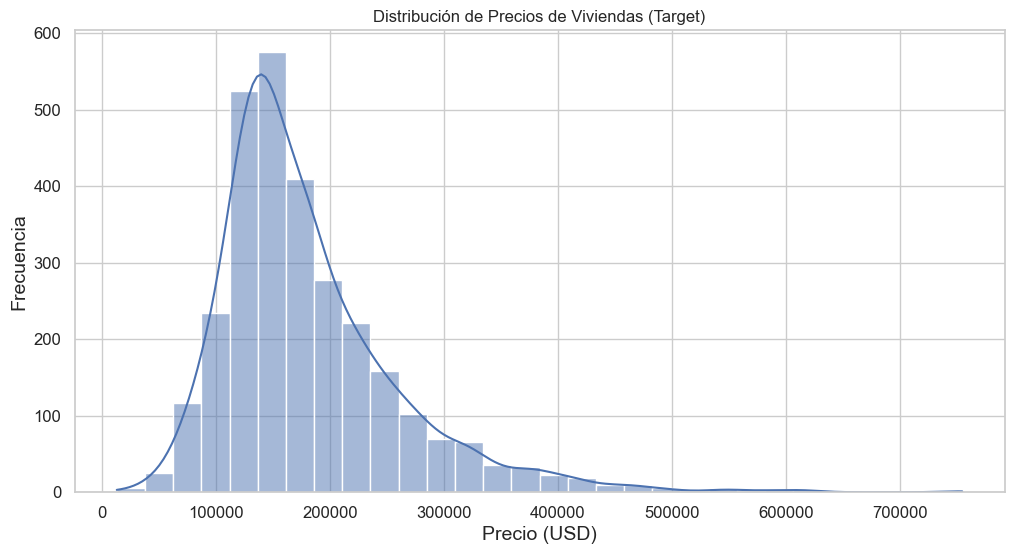

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(housingDF['SalePrice'], kde=True, bins=30)
plt.title('Distribución de Precios de Viviendas (Target)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.savefig('results/SalePriceDistribution.pdf', format='pdf', dpi=300)
plt.show()

In [15]:
print(housingDF['SalePrice'].describe())

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64


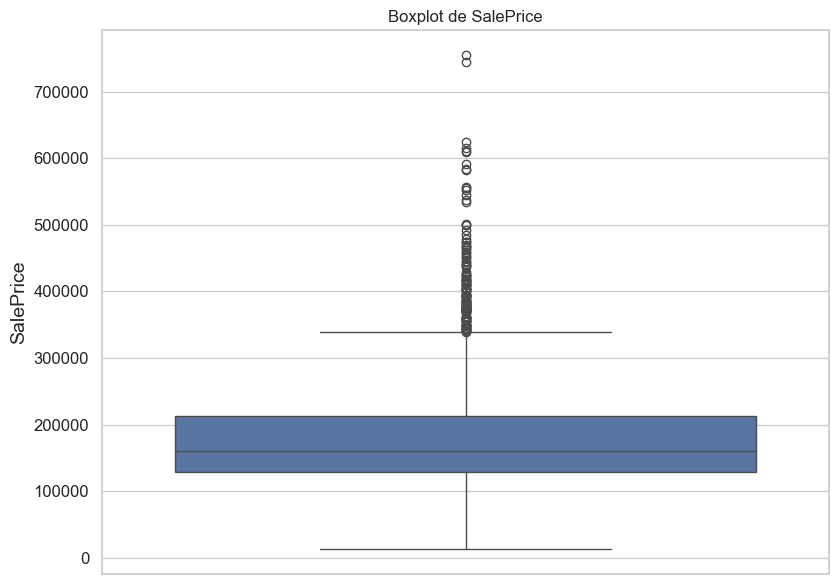

In [25]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=housingDF['SalePrice'])
plt.title('Boxplot de SalePrice')

plt.tight_layout()
plt.show()


de donde, podemos observar cierto sesgo y además, valores extremos o atípicos, los cuales deben ser tratados con particularidad. Continuando con el análisis de normalidad, podemos entonces porceder con las transformaciones necesarias, ergo, también es posible y recomendable realizar muestreo por estratificación, cuando  hay estos desbalances en la distribución de la variable objetivo. 

In [26]:


print("\nTest de normalidad (Shapiro-Wilk):")
stat, p = stats.shapiro(housingDF['SalePrice'])
print(f"Estadístico = {stat:.3f}, p-value = {p:.3f}")
print("No normal" if p < 0.05 else "Normal")



Test de normalidad (Shapiro-Wilk):
Estadístico = 0.876, p-value = 0.000
No normal


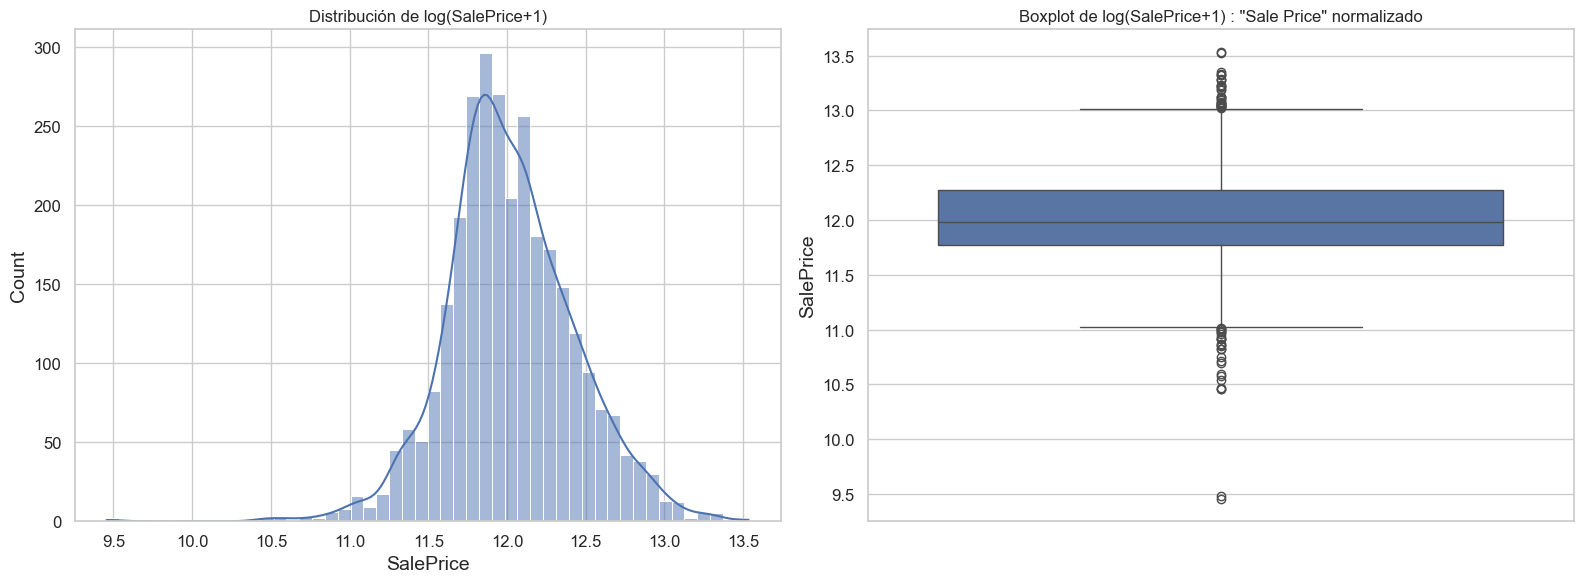

In [29]:

plt.figure(figsize=(16, 6))
log_price = np.log1p(housingDF['SalePrice'])

plt.subplot(1, 2, 1)
sns.histplot(log_price, kde=True, bins=50)
plt.title('Distribución de log(SalePrice+1)')

plt.subplot(1, 2, 2)
sns.boxplot(y=log_price)
plt.title('Boxplot de log(SalePrice+1) : "Sale Price" normalizado')

plt.tight_layout()
plt.show()

#### realizamos el analisis exploratorio considerando todos nuestros atributos

observemos la distribución de los atritutos mediante histogramas, para decidir a futuro sobre el pronóstico y nuestro mejor modelo 

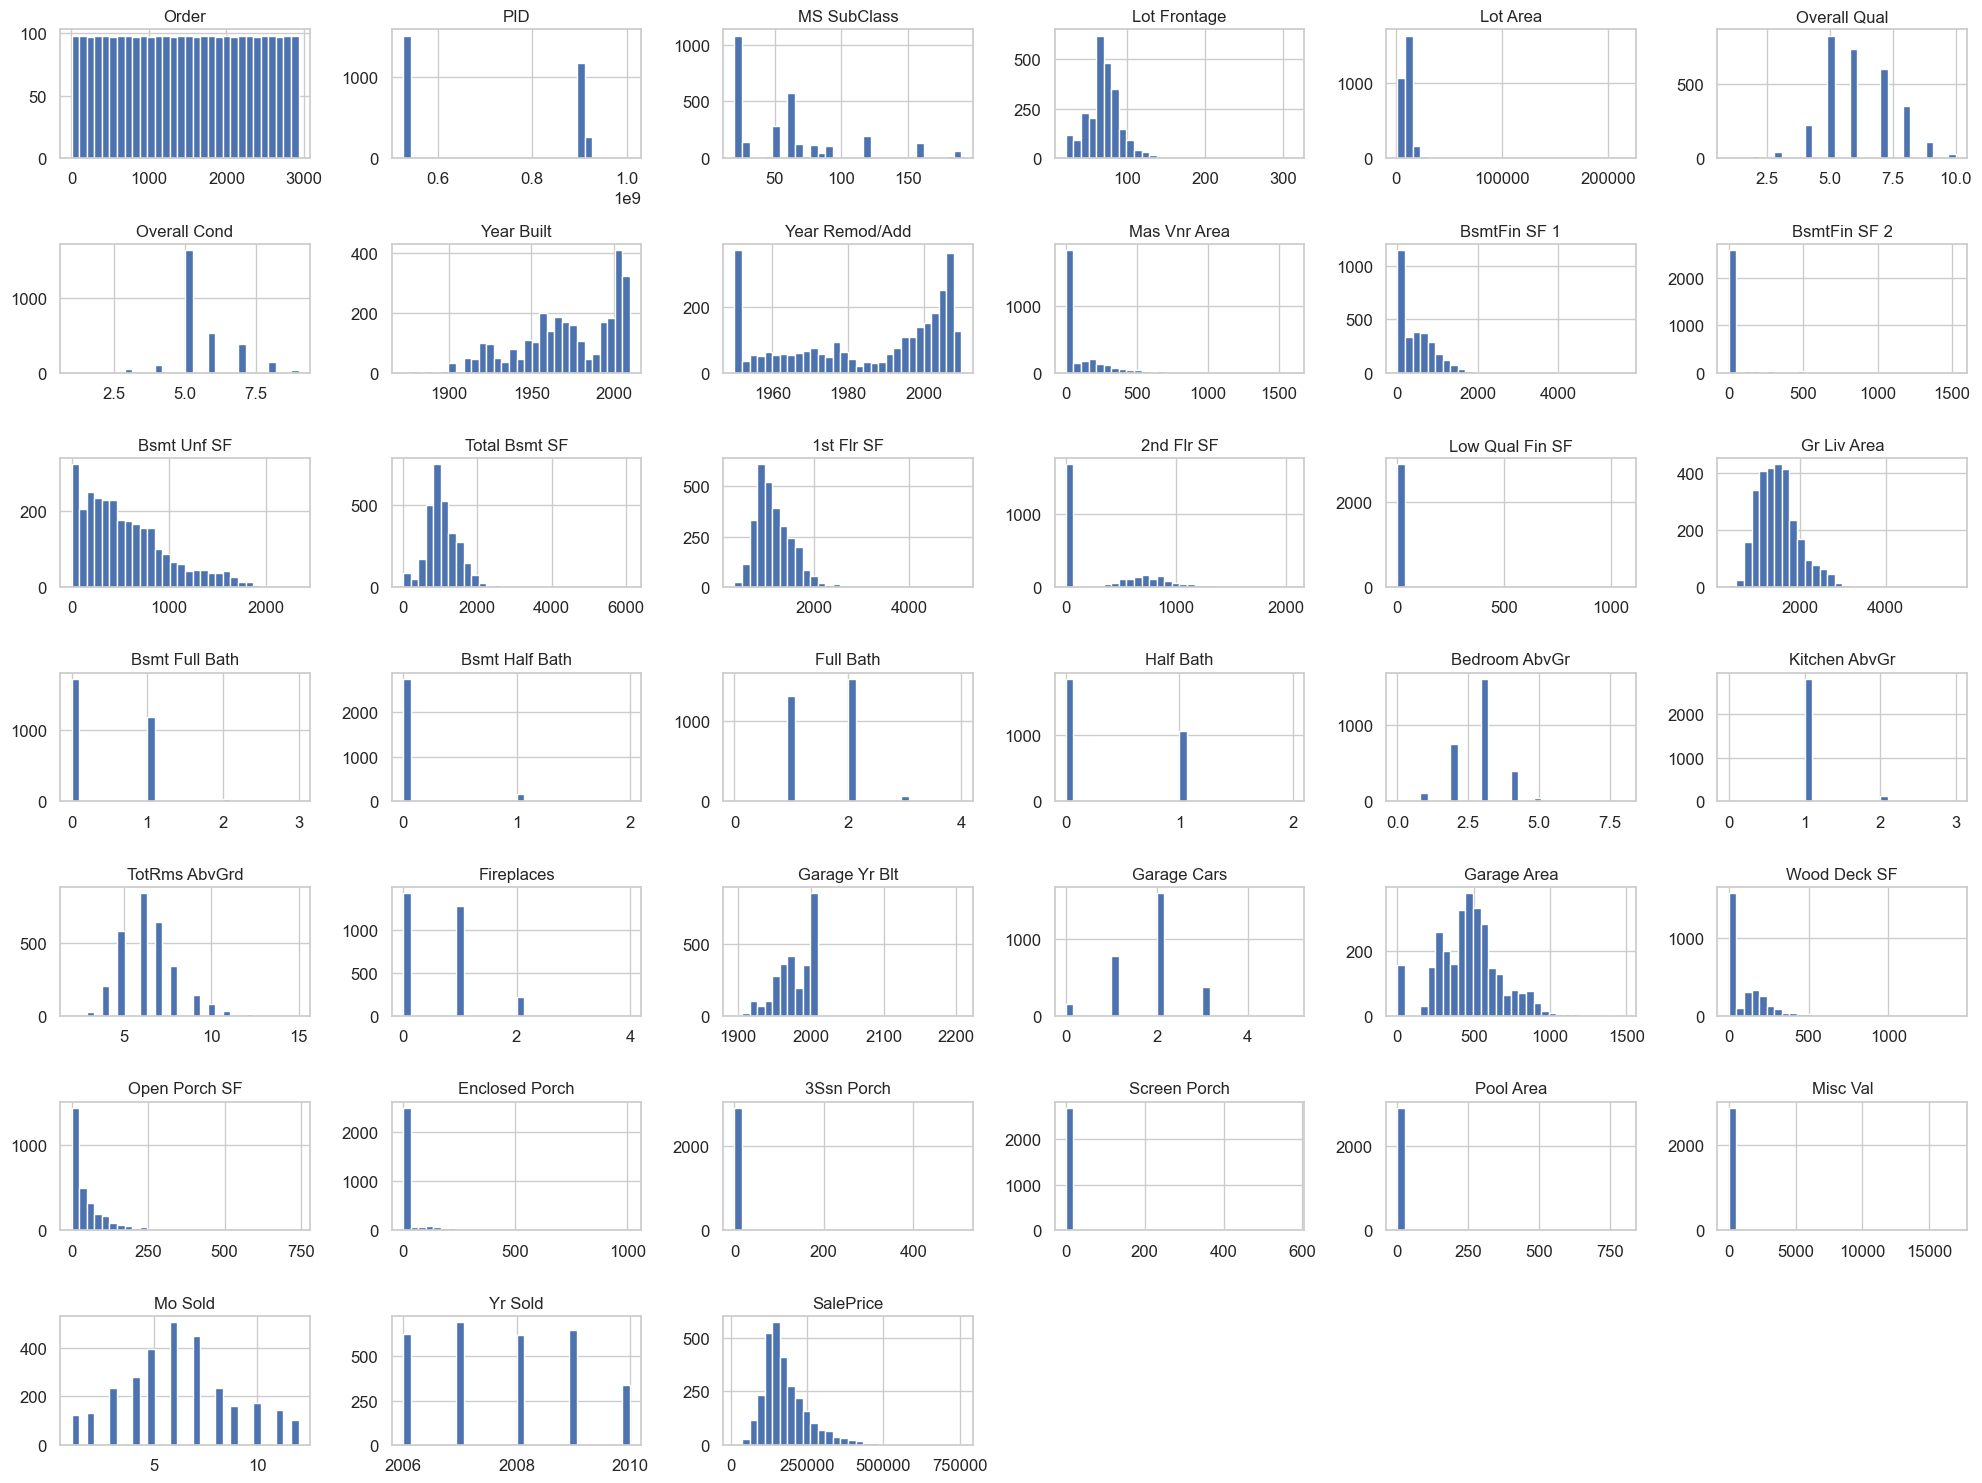

In [16]:
housingDF.hist(bins=30, figsize=(20,15))
plt.tight_layout()
plt.savefig('results/attribute_histogram_plots.pdf', format='pdf', dpi=300)
plt.show()

vemos las estadísticas descriptivas de nuestros atributos

In [17]:

print("\nEstadísticas descriptivas para variables numéricas:")
display(housingDF.describe(include=[np.number]).T)

print("\nEstadísticas descriptivas para variables categóricas:")
display(housingDF.describe(include=['object']).T)


Estadísticas descriptivas para variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2440.0,6.922459e+01,2.336533e+01,21.0,5.800000e+01,68.0,8.000000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2907.0,1.018968e+02,1.791126e+02,0.0,0.000000e+00,0.0,1.640000e+02,1.600000e+03



Estadísticas descriptivas para variables categóricas:


,count,unique,top,freq
MS Zoning,2930,7,RL,2273
Street,2930,2,Pave,2918
Alley,198,2,Grvl,120
Lot Shape,2930,4,Reg,1859
Land Contour,2930,4,Lvl,2633
Utilities,2930,3,AllPub,2927
Lot Config,2930,5,Inside,2140
Land Slope,2930,3,Gtl,2789
Neighborhood,2930,28,NAmes,443
Condition 1,2930,9,Norm,2522


In [18]:
numericalFeatures = housingDF.select_dtypes(include=[np.number]).columns.tolist()
categoricalFeatures = housingDF.select_dtypes(include=['object']).columns.tolist()      
print(f"\nNúmero de variables numéricas: {len(numericalFeatures)}")
print(f"Número de variables categóricas: {len(categoricalFeatures)}")


Número de variables numéricas: 39
Número de variables categóricas: 43


#### PREPROCESS 

de igual forma, es imprescindible realizar una revision de valores faltantes para 
posteriormente decidir sobre estrategias de imputacion o eliminacion

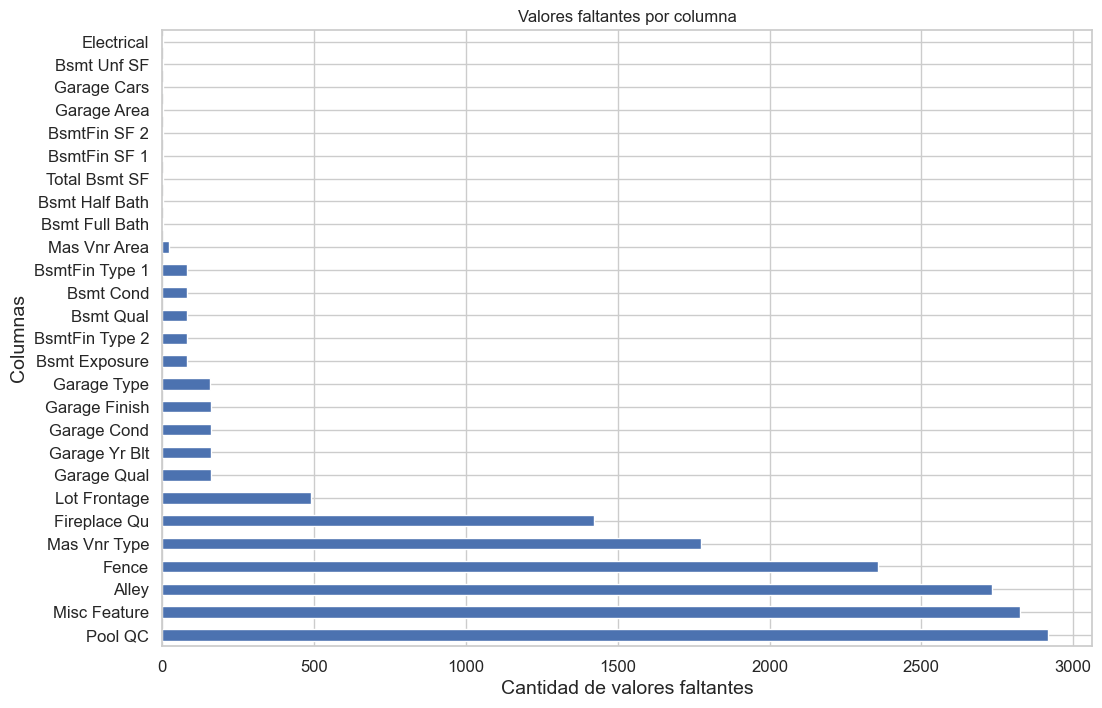

In [21]:
missingValues = housingDF.isnull().sum().sort_values(ascending=False)
missingValues = missingValues[missingValues > 0]

plt.figure(figsize=(12, 8))
missingValues.plot.barh()
plt.title('Valores faltantes por columna')
plt.xlabel('Cantidad de valores faltantes')
plt.ylabel('Columnas')
plt.show()


veamos el porcentaje de valores faltantes


In [23]:
missing_percent = (housingDF.isnull().sum() / housingDF.shape[0]).sort_values(ascending=False)
missing_percent = missing_percent[missing_percent > 0]

print("\nPorcentaje de valores faltantes por columna:")
display(missing_percent.head(20))


Porcentaje de valores faltantes por columna:


Pool QC           0.995563
Misc Feature      0.963823
Alley             0.932423
Fence             0.804778
Mas Vnr Type      0.605802
Fireplace Qu      0.485324
Lot Frontage      0.167235
Garage Qual       0.054266
Garage Yr Blt     0.054266
Garage Cond       0.054266
Garage Finish     0.054266
Garage Type       0.053584
Bsmt Exposure     0.028328
BsmtFin Type 2    0.027645
Bsmt Qual         0.027304
Bsmt Cond         0.027304
BsmtFin Type 1    0.027304
Mas Vnr Area      0.007850
Bsmt Full Bath    0.000683
Bsmt Half Bath    0.000683
dtype: float64

# END NB
Cristhian Mateo Almeida Gómez



presentado al profesor Andrés Marino Alvarez Meza. 